In [413]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [414]:
veri1= pd.read_csv('WHR20_DataForTable2.1.csv')
#calling the dataset

In [415]:
#we are creating the map
trace1 = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',   #location setting to country names
               locations = veri1['Country name'],  #getting the country names
               text = veri1['Regional indicator'],  #getting the continents
               z = veri1['Life Ladder'],  #getting the ladder scores
               )]

layout = dict(title = 'Ladder Score',    #basic map settings
                  geo = dict(
                      showframe = True,   
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

#pre-made earth map types to show user (this is for the ease-of-use)
projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7",
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],      #Interface
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update layout object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

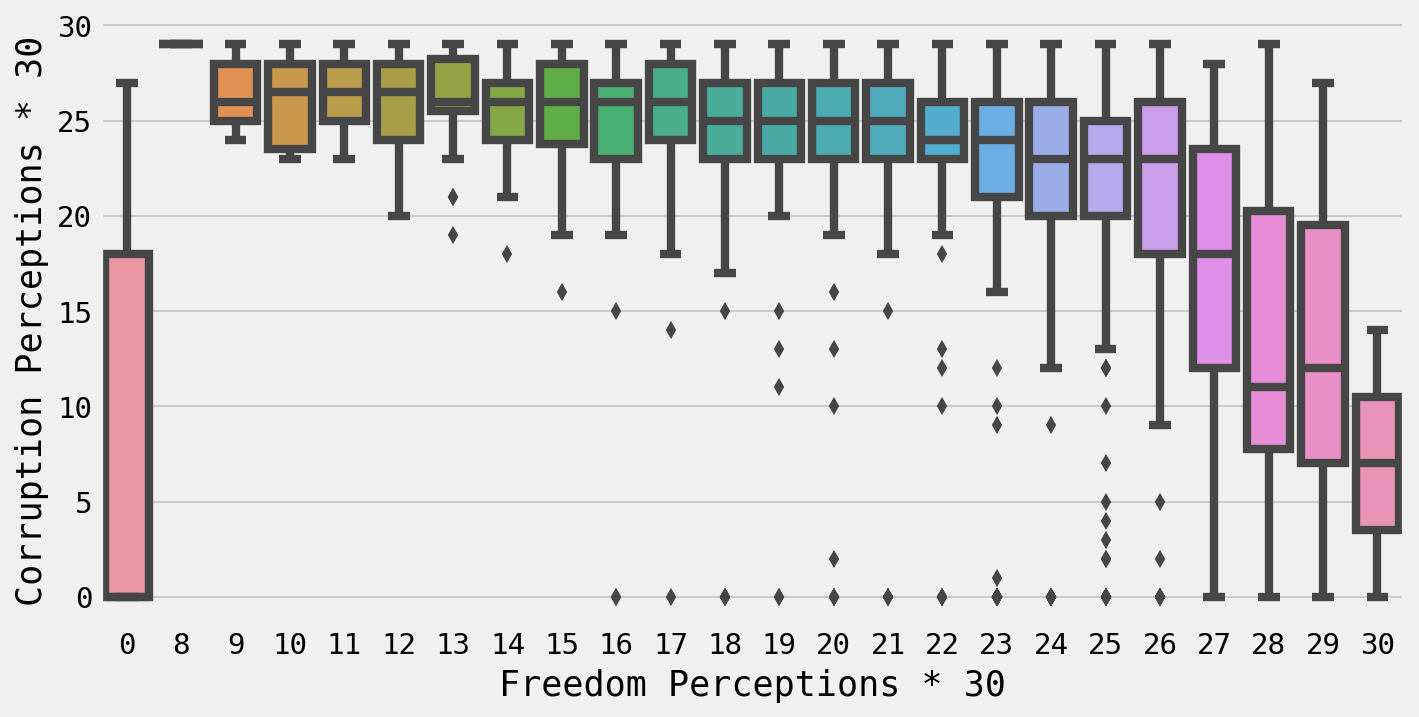

In [421]:
fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150) #set size,dpi and create

ax = sns.boxplot(y='Corruptionx', x='FreedomX', data=veri1) # get values from data-set and set them to x and y coordinates.
     
ax.set_xlabel("Freedom Perceptions * 30")
ax.set_ylabel("Corruption Perceptions * 30")

plt.show()

In [424]:
import warnings
warnings.filterwarnings('ignore') #ignore filtering issues


#create a bubbleplot, get data from data-set LadderScore as X, GDP as Y, Corruption as Size.
figure = bubbleplot(dataset = veri1, x_column = 'Life Ladder', y_column = 'Log GDP per capita', 
    bubble_column = 'Country name', size_column = 'Corruptionx', color_column = 'Regional indicator',
    x_title = "Ladder Score", y_title = "GDP", title = ' Ladder Score vs GDP vs Corruption',
    x_logscale = False, scale_bubble = 0.1, height = 650) 

py.iplot(figure, config={'scrollzoom': True})


In [418]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = veri1, x_column = 'Life Ladder', y_column = 'Log GDP per capita', 
    bubble_column = 'year', size_column = 'Corruptionx', color_column = 'Country name',
    x_title = "Ladder Score", y_title = "GDP", title = ' Ladder Score vs GDP vs Corruption',
    x_logscale = False, scale_bubble = 0.1, height = 650)

py.iplot(figure, config={'scrollzoom': True})